# Actividad en equipo: Análisis del peso

De los datos de la ENCUESTA NACIONAL DE SALUD Y NUTRICIÓN (México)2017-2018; archivo mediciones tiene 17224 registros, con hasta 62 variables, no medidas a todos los individuos.

**Reportar Colab desarrollado en clase para:**

Se quiere analizar la distribución de algunas mediciones antropométricas (peso, talla, cintura). Se propone empezar con el análisis del peso.

Como en la muestra se incluyen diferentes edades es importante, focalizar una subpoblación de interés.

1. Establecer y delimitar el objetivo. (elegir una subpoblación)
2. Limpiar datos en función de objetivo.
3. Hacer un primer análisis descriptivo del peso, considerando las medidas de tendencia central, variabilidad y forma, incluyendo gráficas.
    - a) En lo general ¿Qué aspectos sobresalen?
4. Ahora haga el análisis anterior pero separando por sexo, y repita el inciso 3.
5. ¿Hay diferencias en las mediciones por sexo?


### El objetivo delimitado seleccionado sera personas con edad entre 30 y 45 años de edad cuya talla sea entre 120 y 185

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_excel("EnsanutMediciones.xls")

In [3]:
df_adulto_joven = df[
    df['edad'].between(20, 35)
][['entidad', 'sexo', 'edad', 'peso', 'talla', 'cintura', 'sistol3', 'diastol3']]

# Convertir a numérico (importante)
for col in ['edad', 'peso', 'talla', 'cintura', 'sistol3', 'diastol3']:
    df_adulto_joven[col] = pd.to_numeric(df_adulto_joven[col], errors='coerce')

# Limpieza
df_adulto_joven = df_adulto_joven[df_adulto_joven['talla'].between(120, 185)]
df_adulto_joven = df_adulto_joven[df_adulto_joven['peso'] != 222.22]

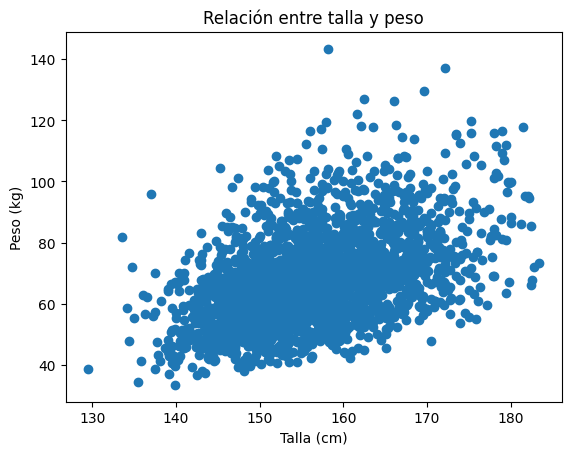

In [4]:
# Gráfico
plt.scatter(df_adulto_joven['talla'], df_adulto_joven['peso'])
plt.title("Relación entre talla y peso")
plt.xlabel("Talla (cm)")
plt.ylabel("Peso (kg)")
plt.show()

In [5]:
# Estadísticas
print("Resumen estadístico del peso (20-35 años):\n")
print(df_adulto_joven['peso'].describe())

r = df_adulto_joven['talla'].corr(df_adulto_joven['peso'])
print("Coeficiente de correlación:", r)


Resumen estadístico del peso (20-35 años):

count    2454.000000
mean       67.461679
std        14.980035
min        33.450000
25%        56.550000
50%        65.875000
75%        76.050000
max       143.350000
Name: peso, dtype: float64
Coeficiente de correlación: 0.48192829957983246


En el grupo de adultos jóvenes (20 a 35 años) con tallas entre 120 y 185 cm, el peso promedio es de alrededor de 67 kg, con la mayoría de los valores entre 55 y 80 kg.

El peso varía moderadamente, y existe una correlación positiva moderada (r = 0.48) entre la talla y el peso: las personas más altas suelen pesar más, aunque también hay diferencias individuales considerables.
En conjunto, los datos representan una distribución relativamente normal del peso para este grupo de edad.

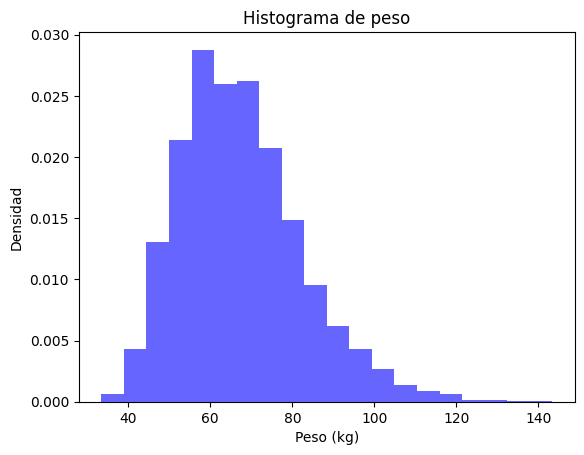

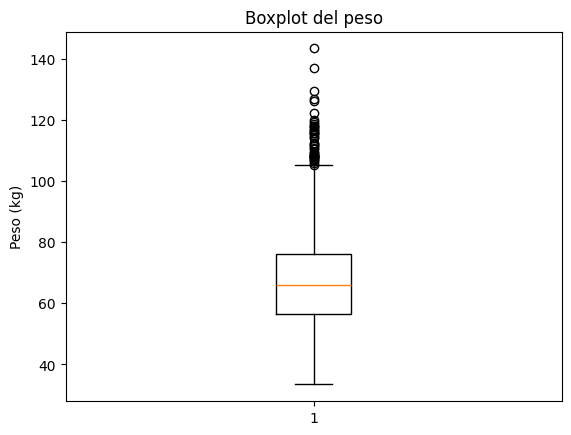

Cuantiles:

0.10    50.100
0.25    56.550
0.50    65.875
0.75    76.050
0.90    87.250
Name: peso, dtype: float64


In [6]:
# Histograma del peso (densidad en lugar de frecuencia)
plt.hist(df_adulto_joven['peso'].dropna(), bins=20, density=True, color='blue', alpha=0.6)
plt.title('Histograma de peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Densidad')
plt.show()

# Boxplot del peso
plt.boxplot(df_adulto_joven['peso'].dropna())
plt.title('Boxplot del peso')
plt.ylabel('Peso (kg)')
plt.show()

# Cuantiles específicos
q = [0.1, 0.25, 0.5, 0.75, 0.9]
quantiles = df_adulto_joven['peso'].quantile(q)

print("Cuantiles:\n")
print(quantiles)

El peso de los adultos jóvenes analizados presenta una distribución casi normal, con una ligera asimetría positiva hacia valores altos. La mayor concentración de observaciones se encuentra entre 55 y 80 kg, rango que corresponde al núcleo central de la distribución y donde se ubica la mayoría de los individuos.

El promedio del peso es cercano a 67 kg, lo que indica que los valores se agrupan en torno a una tendencia central clara. La desviación estándar de aproximadamente 15 kg refleja una variabilidad moderada, típica en este tipo de poblaciones.

Aunque existen algunos casos con peso superior a 100 kg, considerados valores atípicos, estos no alteran significativamente la forma general de la distribución. En conjunto, los resultados muestran una población con características consistentes con un patrón corporal normal, sin presencia de sesgos marcados ni concentraciones extremas de datos.

In [7]:
# Agrupar por sexo y calcular estadísticas descriptivas
descriptivo_sexo = (
    df_adulto_joven.groupby('sexo')
    .agg(
        n=('peso', 'count'),
        Peso_media=('peso', 'mean'),
        Peso_mediana=('peso', 'median'),
        Peso_moda=('peso', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
        Peso_varianza=('peso', 'var'),
        Peso_sd=('peso', 'std'),
        Peso_cv=('peso', lambda x: (x.std() / x.mean()) * 100),
        Peso_min=('peso', 'min'),
        Peso_max=('peso', 'max'),
        Peso_IQR=('peso', lambda x: x.quantile(0.75) - x.quantile(0.25)),
        Peso_skew=('peso', lambda x: skew(x.dropna())),
        Peso_kurtosis=('peso', lambda x: kurtosis(x.dropna()))
    )
    .reset_index()
)

print("Estadísticas descriptivas por sexo:")
descriptivo_sexo

Estadísticas descriptivas por sexo:


,sexo,n,Peso_media,Peso_mediana,Peso_moda,Peso_varianza,Peso_sd,Peso_cv,Peso_min,Peso_max,Peso_IQR,Peso_skew,Peso_kurtosis
0,1,713,73.449004,71.70,69.05,221.402994,14.879617,20.258432,37.45,136.95,19.7,0.824386,0.976815
1,2,1741,65.009661,63.35,56.10,205.052058,14.319639,22.026940,33.45,143.35,18.6,0.818352,0.973322


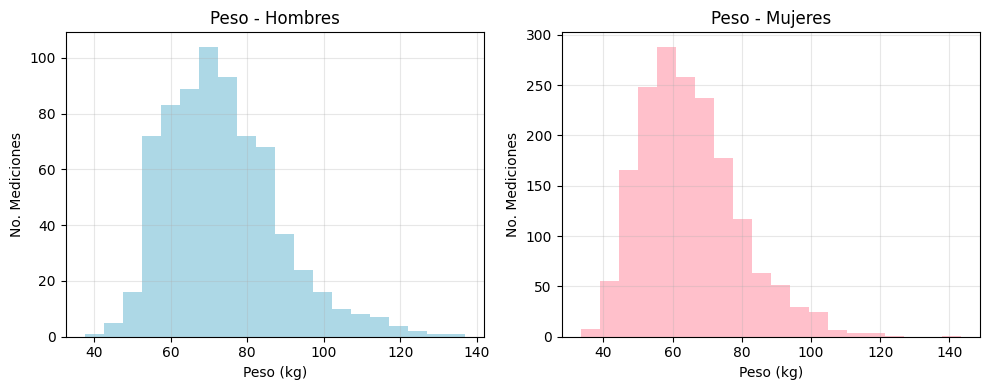

In [8]:
# Histograma por sexo
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

plt.hist(df_adulto_joven.loc[df_adulto_joven['sexo'] == 1, 'peso'].dropna(), bins=20, color='lightblue')
plt.title("Peso - Hombres")
plt.xlabel("Peso (kg)")
plt.ylabel("No. Mediciones")
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.hist(df_adulto_joven.loc[df_adulto_joven['sexo'] == 2, 'peso'].dropna(), bins=20, color='pink')
plt.title("Peso - Mujeres")
plt.xlabel("Peso (kg)")
plt.ylabel("No. Mediciones")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


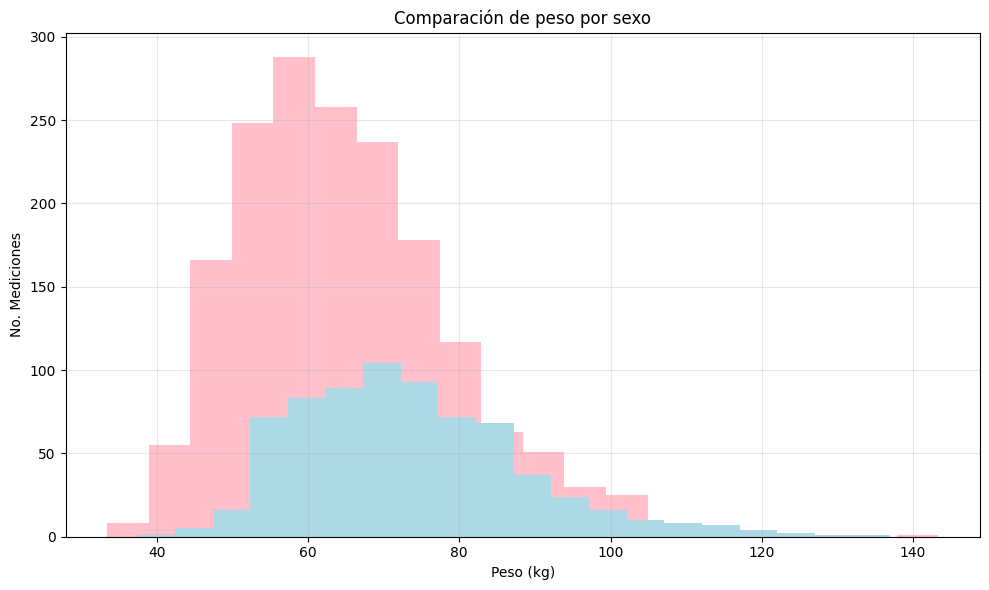

In [9]:
# Histograma por sexo (Comparación)
plt.figure(figsize=(10,6))

plt.hist(df_adulto_joven.loc[df_adulto_joven['sexo'] == 2, 'peso'].dropna(), bins=20, color='pink')
plt.hist(df_adulto_joven.loc[df_adulto_joven['sexo'] == 1, 'peso'].dropna(), bins=20, color='lightblue')

plt.title("Comparación de peso por sexo")
plt.xlabel("Peso (kg)")
plt.ylabel("No. Mediciones")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_12748/452839482.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


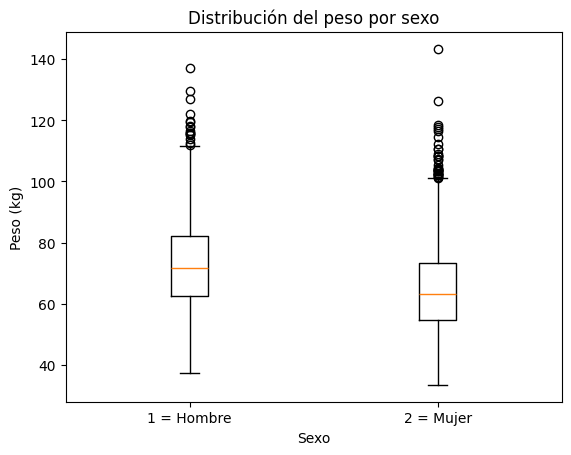

In [10]:
# Boxplot por sexo
plt.boxplot(
    [df_adulto_joven.loc[df_adulto_joven['sexo'] == 1, 'peso'].dropna(),
     df_adulto_joven.loc[df_adulto_joven['sexo'] == 2, 'peso'].dropna()],
    labels=['1 = Hombre', '2 = Mujer']
)
plt.xlabel("Sexo")
plt.ylabel("Peso (kg)")
plt.title("Distribución del peso por sexo")
plt.show()

Los hombres presentan un peso promedio de 73.5 kg, mientras que las mujeres registran 65.0 kg, mostrando una diferencia aproximada de 8 kg entre ambos grupos.

Ambas distribuciones son similares en forma y dispersión, con una variabilidad moderada y ligera asimetría positiva, lo que indica la presencia de algunos valores altos.

En general, los resultados son coherentes con las diferencias biológicas esperadas y muestran que la mayoría de los individuos se encuentra dentro de un rango de peso saludable y normal para su edad y estatura.